In [ ]:
pip install opencv-python-headless


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


install "pip install matplotlib" if needed

EXP1

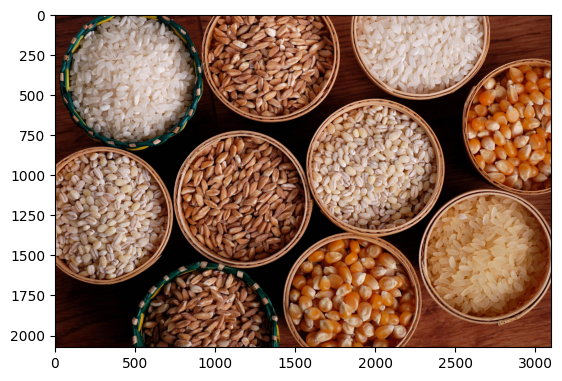

In [11]:
import cv2
import matplotlib.pyplot as plt

# Assuming the image 'grains.jpg' is in the same directory as this script
image_path = 'grains.jpg'

# Read the image
image = cv2.imread(image_path)


    # Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


EXP 2

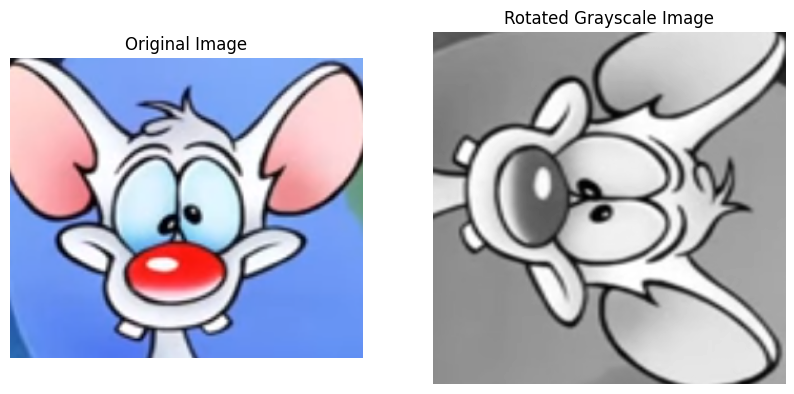

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("mouse.png")
if img is None:
    print("Error: Failed to load the image.")
    exit()

# Resize the image
resized_img = cv2.resize(img, (int(img.shape[1] / 2), int(img.shape[0] / 2)))

# Rotate the image
rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the grayscale image
resized_gray_img = cv2.resize(gray_img, (512, 512))

# Rotate the resized grayscale image
rotated_gray_img = cv2.rotate(resized_gray_img, cv2.ROTATE_90_CLOCKWISE)

# Display the original image using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the rotated grayscale image using matplotlib
plt.subplot(1, 2, 2)
plt.title("Rotated Grayscale Image")
plt.imshow(rotated_gray_img, cmap='gray')
plt.axis('off')

plt.show()


exp3

In [13]:
import cv2
import numpy as np

# Load and convert the first image to grayscale

image1 = cv2.imread('flower.jpg')
if image1 is None:
    print("Error: Failed to load the first image.")
    exit()
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Load and convert the second image to grayscale
# Assuming we are comparing the same image for this example

image2 = cv2.imread( 'mouse.png')
if image2 is None:
    print("Error: Failed to load the second image.")
    exit()
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Resize both images to the target size
target_size = (gray1.shape[1], gray1.shape[0])
gray1_resized = cv2.resize(gray1, target_size)
gray2_resized = cv2.resize(gray2, target_size)

# Compute the correlation
correlation = np.corrcoef(gray1_resized.flatten(), gray2_resized.flatten())[0, 1]

print("Correlation:", correlation)


Correlation:
Correlation: -0.030645586547102335


EXP4

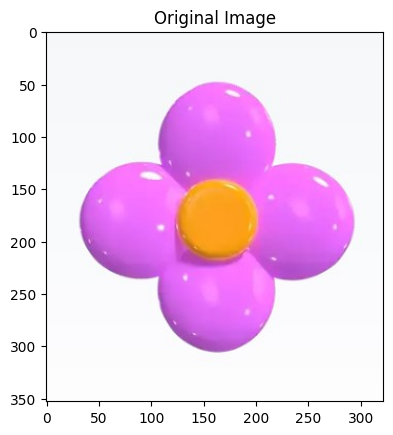

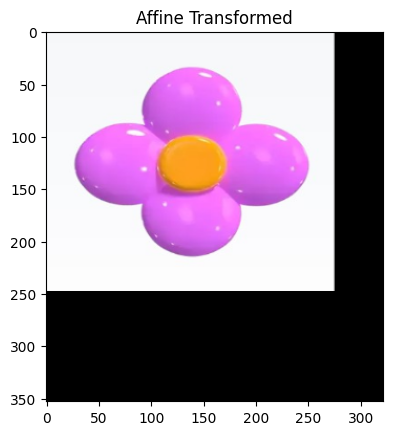

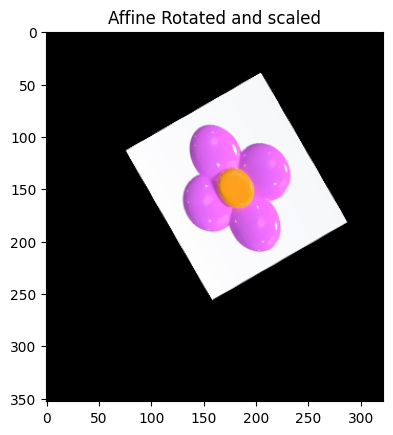

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image

src  = cv2.imread('flower.jpg')
if src is None:
    print("Could not open or find the image:")
    exit(0)

# Define source and destination triangles for affine transform
srcTri = np.array([[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]]).astype(np.float32)
dstTri = np.array([[0, 0], [src.shape[1] * 0.85, 0], [0, src.shape[0] * 0.7]]).astype(np.float32)

# Compute the affine transform
warp_mat = cv.getAffineTransform(srcTri, dstTri)
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))

# Define the center for rotation and compute the rotation matrix
center = (warp_dst.shape[1] // 2, warp_dst.shape[0] // 2)
angle = -60
scale = 0.6
rot_mat = cv.getRotationMatrix2D(center, angle, scale)
warp_rotate_dst = cv.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))

plt.title("Original Image")
plt.imshow( cv.cvtColor(src, cv.COLOR_BGR2RGB))
plt.show()
plt.title("Affine Transformed")
plt.imshow( cv.cvtColor(warp_dst, cv.COLOR_BGR2RGB))
plt.show()
plt.title("Affine Rotated and scaled")
plt.imshow( cv.cvtColor(warp_rotate_dst, cv.COLOR_BGR2RGB))
plt.show()



EXP 5

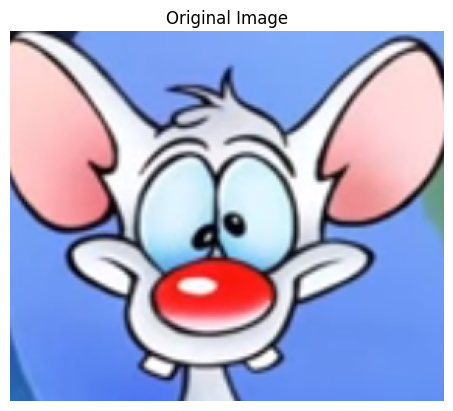

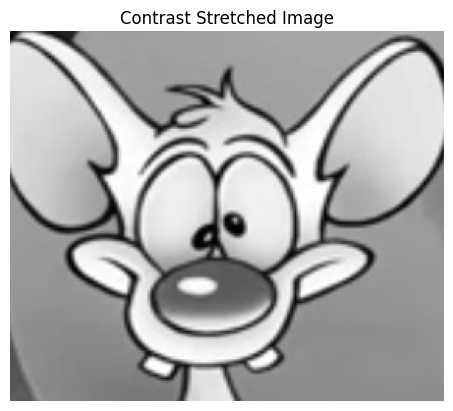

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    min_val = np.min(gray_image)
    max_val = np.max(gray_image)
    stretching_range = max_val - min_val
    stretched_image = np.uint8((gray_image - min_val) * (255 / stretching_range))
    return stretched_image

# Load the image from the local file system
image_filename = 'mouse.png'  # Replace with your image file name
image = cv2.imread(image_filename)
if image is None:
    print("Could not open or find the image:", image_filename)
    exit(0)

# Perform contrast stretching
stretched_image = contrast_stretching(image)

# Display the images using matplotlib
def display_image(image, title):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.axis('off')

display_image(image, "Original Image")
display_image(stretched_image, "Contrast Stretched Image")

plt.show()


EXP 6

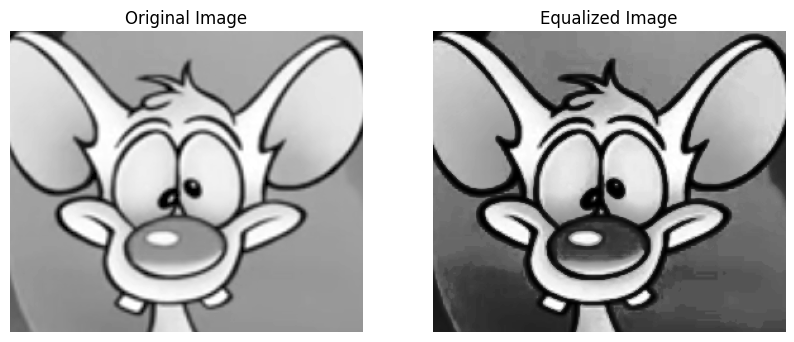

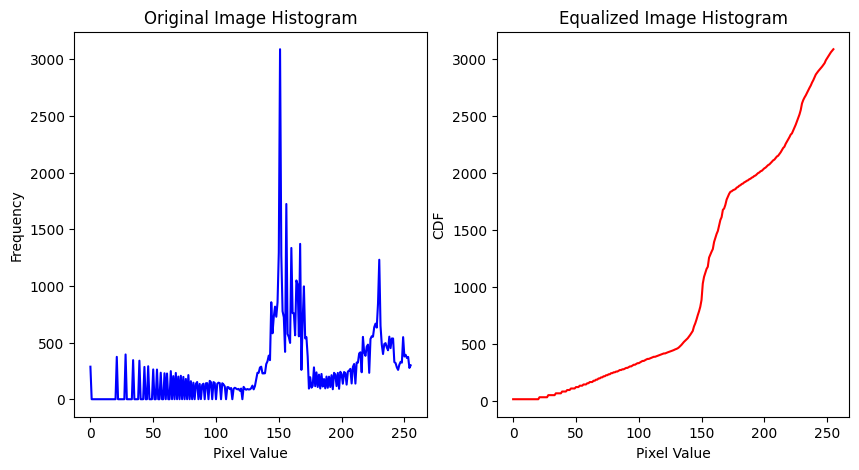

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    if image is None:
        print("Error: Unable to load image.")
        return None, None, None

    # Compute the histogram of the image
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Use the CDF to equalize the image
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_image = cdf[image]

    return equalized_image, hist, cdf_normalized

# Load the image from the local file system
image_filename = 'mouse.png'  # Replace with your image file name
image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

equalized_image, hist, cdf = histogram_equalization(image)

if equalized_image is not None:
    # Display the original and equalized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')
    plt.show()

    # Display the histograms
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist, color='blue')
    plt.title('Original Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.plot(cdf, color='red')
    plt.title('Equalized Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('CDF')
    plt.show()
